## 正規分布について

正規分布（Normal Distribution）は、統計学と確率論において非常に重要な分布の一つです。多くの自然現象や社会現象がこの分布に従うことから、ガウス分布（Gaussian Distribution）とも呼ばれます。

### 定義

正規分布は、平均 $\mu$ と分散 $\sigma^2$ を持つ連続確率分布です。その確率密度関数 (PDF) は次のように表されます：

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

ここで、
- $\mu$ は分布の平均（期待値）
- $\sigma^2$ は分布の分散
- $\sigma$ は分布の標準偏差

### 特性

正規分布の主な特性は以下の通りです：

1. **平均（期待値）**:
    $$ \mathbb{E}[X] = \mu $$

2. **分散**:
    $$ \text{Var}(X) = \sigma^2 $$

3. **対称性**:
    正規分布は平均 $\mu$ を中心に対称です。

4. **68-95-99.7 ルール**:
    - 平均 $\mu$ から $\pm 1\sigma$ の範囲に全データの約68%が含まれます。
    - 平均 $\mu$ から $\pm 2\sigma$ の範囲に全データの約95%が含まれます。
    - 平均 $\mu$ から $\pm 3\sigma$ の範囲に全データの約99.7%が含まれます。

### 標準正規分布

標準正規分布は、平均が0、分散が1の特別な正規分布です。その確率密度関数 (PDF) は次のようになります：

$$
f(x) = \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right)
$$

標準正規分布は通常 $Z$ と表記され、任意の正規分布 $X \sim N(\mu, \sigma^2)$ は次の変換によって標準正規分布に従う $Z$ に変換できます：

$$
Z = \frac{X - \mu}{\sigma}
$$

### Pythonでの実装例

正規分布から乱数を生成し、そのヒストグラムと理論的なPDFをプロットする例を示します。


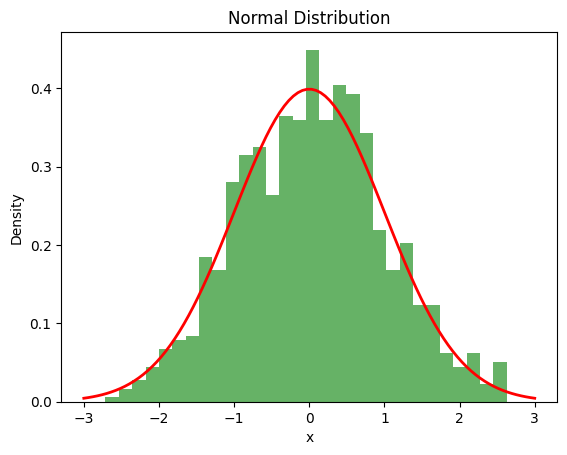

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 平均と標準偏差の設定
mu = 0
sigma = 1

# 正規分布から1000個の乱数を生成
samples = np.random.normal(mu, sigma, 1000)

# ヒストグラムをプロット
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# 理論的なPDFをプロット
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Normal Distribution')
plt.show()

## 正規分布のモーメント母関数について

モーメント母関数（Moment Generating Function, MGF）は、確率分布のモーメント（期待値、分散など）を導出するための有力なツールです。正規分布のモーメント母関数 $M_X(t)$ を導出し、その性質を確認してみましょう。

### モーメント母関数の定義

ある確率変数 $X$ のモーメント母関数は次のように定義されます：

$$
M_X(t) = \mathbb{E}[e^{tX}]
$$

ここで、$\mathbb{E}[\cdot]$ は期待値を表します。

### 正規分布のモーメント母関数の導出

正規分布 $X \sim N(\mu, \sigma^2)$ に対して、モーメント母関数を導出します。

1. **定義に基づく計算**:

   $X \sim N(\mu, \sigma^2)$ の場合、

   $$
   M_X(t) = \mathbb{E}[e^{tX}] = \int_{-\infty}^{\infty} e^{tx} f_X(x) \, dx
   $$

   ここで、$f_X(x)$ は正規分布の確率密度関数 (PDF) です：

   $$
   f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
   $$

2. **積分を計算する**:

   $$
   M_X(t) = \int_{-\infty}^{\infty} e^{tx} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) \, dx
   $$

   指数部分を整理します：

   $$
   e^{tx} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) = \exp\left(tx - \frac{(x - \mu)^2}{2\sigma^2}\right)
   $$

3. **指数部分をまとめる**:

   $$
   tx - \frac{(x - \mu)^2}{2\sigma^2} = tx - \frac{x^2 - 2\mu x + \mu^2}{2\sigma^2}
   $$

   さらに整理すると、

   $$
   = -\frac{x^2 - 2\sigma^2 tx + 2\mu x - \mu^2}{2\sigma^2}
   $$

   さらに、

   $$
   = -\frac{(x - (\mu + \sigma^2 t))^2 - (\mu + \sigma^2 t)^2 + \mu^2}{2\sigma^2}
   $$

4. **平方完成を利用して**:

   $$
   \exp\left(-\frac{(x - (\mu + \sigma^2 t))^2}{2\sigma^2}\right) \exp\left(\frac{(\mu + \sigma^2 t)^2 - \mu^2}{2\sigma^2}\right)
   $$

5. **積分計算**:

   $$ 
   M_X(t) = \exp\left(\frac{(\mu + \sigma^2 t)^2 - \mu^2}{2\sigma^2}\right) \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - (\mu + \sigma^2 t))^2}{2\sigma^2}\right) \, dx
   $$

   積分部分は、標準正規分布のPDFの形をしており、積分すると1になるので、

   $$ 
   M_X(t) = \exp\left(\frac{(\mu + \sigma^2 t)^2 - \mu^2}{2\sigma^2}\right)
   $$

6. **簡略化**：

   $$
   = \exp\left(\frac{\mu^2 + 2\mu\sigma^2 t + \sigma^4 t^2 - \mu^2}{2\sigma^2}\right) = \exp\left(\mu t + \frac{\sigma^2 t^2}{2}\right)
   $$

### 結論

正規分布 $X \sim N(\mu, \sigma^2)$ のモーメント母関数は次のように表されます：

$$
M_X(t) = \exp\left(\mu t + \frac{\sigma^2 t^2}{2}\right)
$$

この結果は、正規分布の多くの重要な特性を簡単に導出するための強力なツールとなります。

### モーメントの計算

モーメント母関数の $t$ による導関数を計算することで、モーメントを求めることができます。例えば、1次モーメント（平均）は $M_X(t)$ の1階導関数を $t = 0$ で評価することで得られます：

$$
\mathbb{E}[X] = M'_X(0)
$$

同様に、2次モーメントは次のように求められます：

$$
\mathbb{E}[X^2] = M''_X(0)
$$

このようにして、モーメント母関数を利用して、正規分布のさまざまなモーメントを計算することができます。